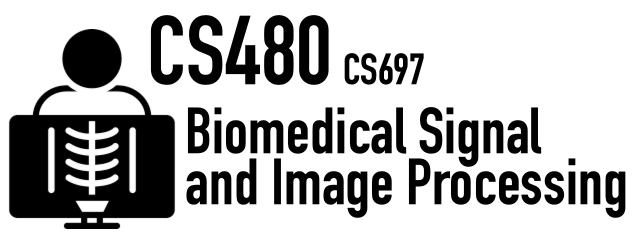
# Assignment 1


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [3]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [4]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
from9to11seconds = ecg[8*SAMPLING_RATE:10*SAMPLING_RATE]

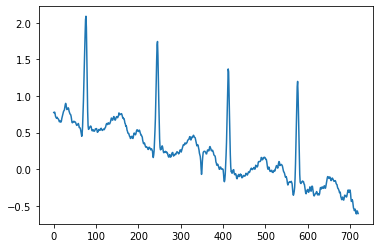

In [5]:
plt.plot(from9to11seconds)

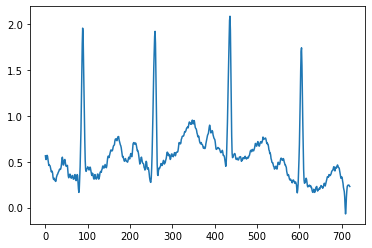

In [6]:
#take the sampling rate into account to only plot the range
# between 8 to 10 seconds.
from8to10seconds = ecg[7*SAMPLING_RATE:9*SAMPLING_RATE]
plt.plot(from8to10seconds)

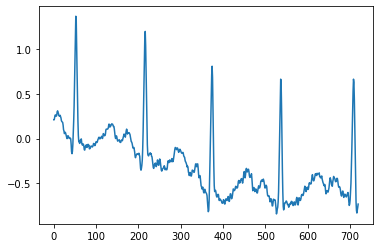

In [7]:
# take the sampling rate into account to only plot the range
# between 10 to 12 seconds.
from10to12seconds = ecg[9*SAMPLING_RATE:11*SAMPLING_RATE]
plt.plot(from10to12seconds)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [118]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [8]:
# we now need to install the neurokit2 library
# !pip install neurokit2
import neurokit2 as nk

In [9]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [10]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


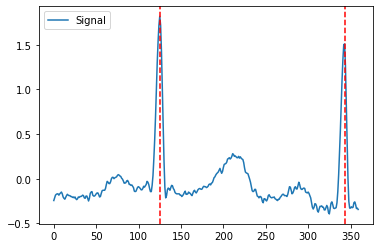

In [11]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [30]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [12]:
# declar variables
begin = 8*SAMPLING_RATE-100
end = 12*SAMPLING_RATE+100

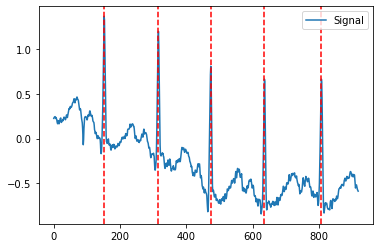

In [13]:
_, rpeaks_from9to11seconds = nk.ecg_peaks(ecg[begin:end], sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks_from9to11seconds['ECG_R_Peaks'][2:7]-SAMPLING_RATE, ecg[9*SAMPLING_RATE-100:11*SAMPLING_RATE+100])

**Task 3:** Detect Heartrate. [15 Points]

In [14]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [36]:
rpeaks_list = []
while (0 < len(rpeaks['ECG_R_Peaks'])):
    # Firstly, let's see the delta time which means the distance between number of beats.
    rpeaks_delta_time = [rpeaks['ECG_R_Peaks'][1:] - rpeaks['ECG_R_Peaks'][:-1]]
    # Secondly convert to BPM and the result the time interval
    time_dist = [SAMPLING_RATE / rpeaks_delta_time] * 10
    rpeaks_list.append(time_dist)

# Finally, look at the result mean and standard deviation to check for abnormality or normal heart rate.
bpm_mean = 60 / np.mean(rpeaks_list)
print(bpm_mean)

TypeError: unsupported operand type(s) for /: 'int' and 'list'

**Task 4:** Detect P Q S T Peaks. [25 Points]

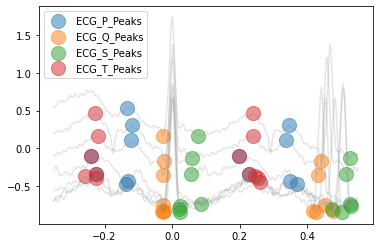

In [14]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

_, waves_peak = nk.ecg_delineate(ecg[8*SAMPLING_RATE:12*SAMPLING_RATE], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [34]:
# TODO Does the detection work well?
# The detection works well but the graph has difficulties to observe.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

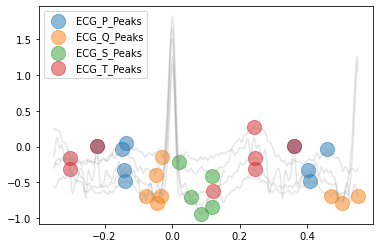

In [18]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.
_, rpeaks_whole_signal = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
_, wave_peaks_1000 = nk.ecg_delineate(ecg[:1000], rpeaks_whole_signal['ECG_R_Peaks'][0:5], sampling_rate=SAMPLING_RATE, show=True,show_type='peaks')

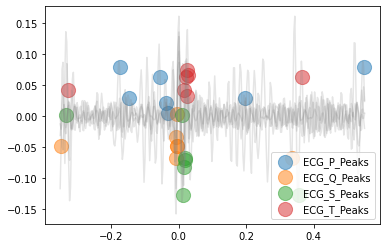

In [24]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filtered_ecg = nk.signal_filter(ecg, sampling_rate=SAMPLING_RATE, lowcut=40, highcut=100)
_, rpeaks_filtered = nk.ecg_peaks(filtered_ecg, sampling_rate=SAMPLING_RATE)
_, wave_peaks_filtered = nk.ecg_delineate(filtered_ecg, rpeaks_filtered['ECG_R_Peaks'][0:5], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [37]:
# TODO Does the filtering improve the result?
# My filtering may not work as expected.

In [38]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#